In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ex4.ipynb',
 'Ex4_data_preparation-R.ipynb',
 'exercise_04.pdf',
 'spambase.data.txt',
 'spambase.DOCUMENTATION.txt',
 'spambase.names.txt',
 'spam_base_test.csv',
 'spam_base_train.csv']

In [3]:
dataframe = pd.read_csv('spam_base_train.csv')

In [4]:
def load_data(filename):
    # Split dataframe into X and Y numpy arrays, add 1 padding to X
    dataframe = pd.read_csv(filename)
    X = np.array(dataframe, dtype = 'float64')[:,:-1]
    X = np.pad(X,1,'constant',constant_values=(1))[1:X.shape[0]+1,0:X.shape[1]+1]
    Y = np.array(dataframe, dtype = 'int')[:,-1:]
    
    return (X, Y)

In [5]:
X_train, Y_train = load_data('spam_base_train.csv')
X_train.shape

(3221, 58)

<h2>Logit model from exercise 3</h2>

In [6]:
def get_likelihood(cross_product):
    return 0.5 + 0.5 * np.tanh(cross_product / 2)

In [7]:
def train_logit(X, Y, acc_const = 0.00001):
    const = 0.00001
    teta = np.zeros([X.shape[1], 1], dtype = 'float64')

    likelihood_old = 1.
    converge_idx = 1.

    while converge_idx > 0.00001:
        cross_product = X.dot(teta)
        hteta = np.apply_along_axis(get_likelihood, 0,cross_product)
        likelihood = np.transpose(Y).dot(cross_product) - sum(np.ones([cross_product.shape[0],1]) -  np.exp(cross_product))
        converge_idx = (likelihood_old - likelihood) / likelihood_old
        deriva = np.transpose(X).dot(Y - hteta)
        
        if converge_idx <= 0.0001:
            break
        
        teta = teta + const * deriva

    return teta

In [9]:
def logit_predict(x, coef):
    cross_product = x.dot(coef)
    return get_likelihood(cross_product)

<h2> Apply model & Report F Measure</h2>

In [10]:
coef = train_logit(X_train, Y_train)
np.transpose(coef)

array([[-0.02805595,  0.00205158, -0.00914315,  0.00573615,  0.00692994,
         0.01310739,  0.00573449,  0.01469252,  0.00818826,  0.00636297,
         0.00328708,  0.00435962, -0.01548288,  0.00197417,  0.00035848,
         0.00553423,  0.02280241,  0.01124735,  0.00971271,  0.01531798,
         0.01103123,  0.03686321,  0.00787759,  0.01297281,  0.01057831,
        -0.06898876, -0.03335918, -0.07706435, -0.01466624, -0.01214646,
        -0.01290086, -0.00872363, -0.00583337, -0.01216267, -0.00581915,
        -0.01379408, -0.01024531, -0.01404293, -0.00128035, -0.00997825,
        -0.00480489, -0.00620655, -0.01791639, -0.00545112, -0.01150035,
        -0.02655583, -0.02330925, -0.00060838, -0.00433375, -0.00374318,
        -0.00758666, -0.00152014,  0.01905912,  0.00816083,  0.00258316,
         0.01202989,  0.0267935 ,  0.0332524 ]])

In [11]:
X_test, Y_test = load_data('spam_base_test.csv')
X_test.shape

(1380, 58)

In [12]:
Y_hat = np.array([logit_predict(X_test[idx,:], coef) for idx in range(0,X_test.shape[0])])
Y_hat = Y_hat.round()
acc = sum(Y_hat == Y_test) / Y_test.shape[0]
acc

array([ 0.85724638])

In [13]:
def F_score(Y, Y_hat, beta):
    true_positives = sum(np.logical_and(Y == True , Y_hat == True))
    false_positives = sum(np.logical_and(Y == False , Y_hat == True))
    false_negatives = sum(np.logical_and(Y == True , Y_hat == False))
    
    precision =  true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    F = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
    
    return F[0]

In [14]:
F_beta = np.array([[beta , F_score(Y_test, Y_hat, beta)] for beta in np.arange(0.5, 1.01, 0.05)])
F_beta

array([[ 0.5       ,  0.80333333],
       [ 0.55      ,  0.80614944],
       [ 0.6       ,  0.80900429],
       [ 0.65      ,  0.81186577],
       [ 0.7       ,  0.81470642],
       [ 0.75      ,  0.81750339],
       [ 0.8       ,  0.82023824],
       [ 0.85      ,  0.82289653],
       [ 0.9       ,  0.82546741],
       [ 0.95      ,  0.82794315],
       [ 1.        ,  0.83031869]])

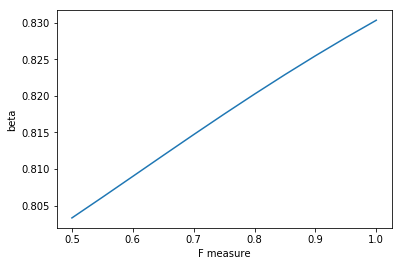

In [15]:
plt.plot(F_beta[:,0], F_beta[:,1])
plt.xlabel('F measure')
plt.ylabel('beta')
plt.show()